In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

path = "./data/"
filename_read = os.path.join(path,"drinks.csv")
ddf = pd.read_csv(filename_read, na_values=['NA','?'])

# for test & splitting set
drinksNoProcessing = ddf

ddf.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,NaN,57.0,45.0,5.9,Africa


In [ ]:
print(ddf['continent'].value_counts().sort_values(ascending=False).head())

Africa           52
Asia             41
Europe           41
North America    22
Oceania          16
Name: continent, dtype: int64


In [ ]:
ddf.drop(['country'],inplace=True,axis=1)
coolcontinent = ['Asia','Europe']
ddf = ddf[ddf['continent'].isin(coolcontinent) == True]
print(ddf['continent'].value_counts().sort_values(ascending=False))

Asia      41
Europe    41
Name: continent, dtype: int64


In [ ]:
ddf = ddf.reset_index(drop=True)
ddf.head(83) #some asian countries have 0 for all attributes. Don't know if i should drop

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,245.0,138.0,312.0,12.4,Europe
3,21.0,179.0,11.0,3.8,Europe
4,279.0,75.0,191.0,9.7,Europe
...,...,...,...,...,...
77,16.0,135.0,5.0,2.8,Asia
78,219.0,126.0,195.0,10.4,Europe
79,25.0,101.0,8.0,2.4,Asia
80,NaN,2.0,1.0,2.0,Asia


# Filter Decision

In [ ]:
print('Number of missing values:')
print(ddf.isna().sum())

Number of missing values:
beer_servings                   7
spirit_servings                 5
wine_servings                   3
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


In [ ]:
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

In [ ]:
missing_median(ddf,'beer_servings')
missing_median(ddf,'spirit_servings')
missing_median(ddf,'wine_servings')

print(ddf.isna().sum())

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


# Correlation Checking
Some attributes are correlated with each other. We decided to drop total_litres_of_pure_alcohol since it was highly correlated with beer and wine servings.

In [ ]:
ddfCorrelCheck = ddf;
ddfCorrelCheck.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.522559,0.651517,0.878188
spirit_servings,0.522559,1.000000,0.204778,0.658840
wine_servings,0.651517,0.204778,1.000000,0.745136
total_litres_of_pure_alcohol,0.878188,0.658840,0.745136,1.000000


In [ ]:
continentMapping={'Asia':0,'Europe':1}
ddf['continent'] = ddf['continent'].map(continentMapping)

###Train and Test Data

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Y = pd.DataFrame(ddf, columns=['continent'])
#'spirit_servings','beer_servings','wine_servings','total_litres_of_pure_alcohol'
X = ddf.filter(['spirit_servings','beer_servings','wine_servings'])

x_train, x_test, y_train, y_test, = train_test_split(X,Y,test_size=0.20, random_state=69)

print(y_train);

    continent
72          0
32          0
74          0
4           1
34          0
..        ...
20          1
55          1
73          1
75          0
54          0

[65 rows x 1 columns]


# Decision Tree (DT)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
clf=clf.fit(x_train,y_train)


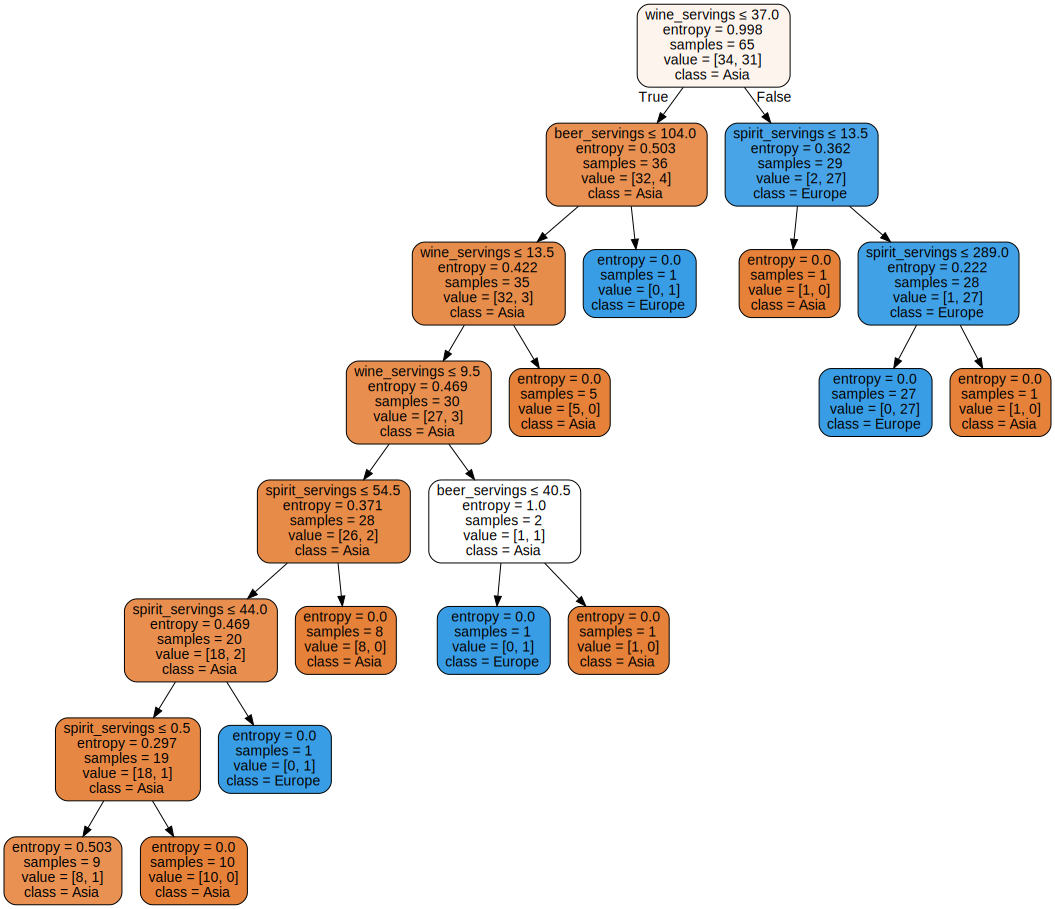

In [ ]:
import graphviz  

dot_data = tree.export_graphviz(clf, out_file =None,feature_names =x_train.columns,class_names=['Asia','Europe'], filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data) 
graph 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

predClassY = clf.predict(x_test)
testY = y_test['continent']
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predClassY)))

Accuracy on test data is 0.76


[[6 1]
 [3 7]]
Accuracy on test data is 0.76
F1 score on test data is 0.77
Precision Score on test data is 0.79
Recall score on test data is 0.76
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.88      0.70      0.78        10

    accuracy                           0.76        17
   macro avg       0.77      0.78      0.76        17
weighted avg       0.79      0.76      0.77        17



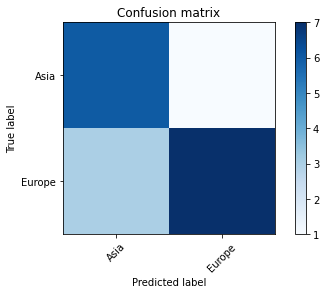

In [ ]:
confusion = confusion_matrix(testY, predClassY)
print(confusion)

plot_confusion_matrix(confusion, ['Asia','Europe'], title='Confusion matrix', cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predClassY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predClassY, average='weighted')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predClassY, average='weighted')))
print('Recall score on test data is %.2f' % (recall_score(testY, predClassY, average='weighted')))
print( classification_report(testY,predClassY))

# Logistic Regression (Logit)

[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Text(0, 0.5, 'Accuracy')

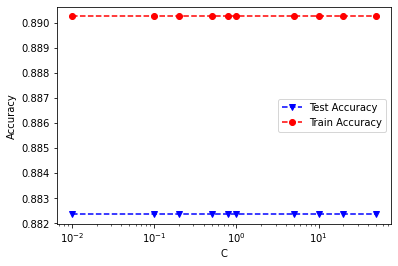

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,Y)
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y,log_reg_pred_train))

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy') 

In [ ]:
# test accuracy score
print(accuracy_score(y_test, log_reg_pred))
# train accuracy score
print(accuracy_score(Y, log_reg_pred_train))

0.8823529411764706
0.8902439024390244


# Naive Baynes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
Accuracy on test data is 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K-Nearest Neighbor (KNN)

[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0]
[1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Accuracy')

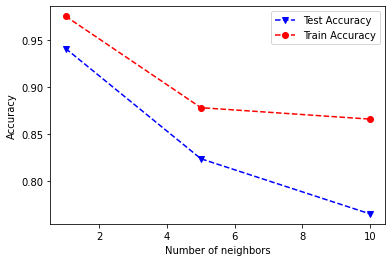

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, Y)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(X)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
# test accuracy score
print(accuracy_score(y_test, knn_pred))
# train accuracy score
print(accuracy_score(Y,knn_pred_train))

0.7647058823529411
0.8658536585365854


# Support Vector Machine (SVM) Classifier

### Linear Decision Boundary
Code runs quickly, so we can separate the groups using a linear line function.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0]


Text(0, 0.5, 'Accuracy')

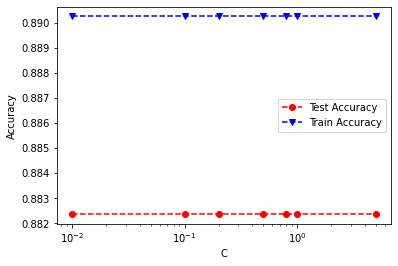

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,Y)
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In [ ]:
# test accuracy score
print(accuracy_score(y_test, svml_pred))
# train accuracy score
print(accuracy_score(Y, svml_pred_train))

0.8823529411764706
0.8902439024390244


### Non Linear Decision Boundary
Code also runs quickly, so non-linear kernel can be used.

[1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1]
[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Text(0, 0.5, 'Accuracy')

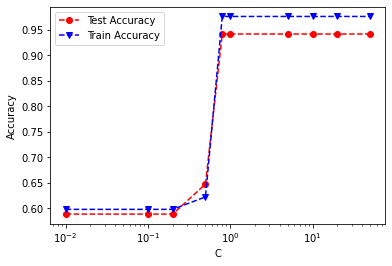

In [ ]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y)
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [ ]:
# test accuracy score
print(accuracy_score(y_test, svml_pred))
# train accuracy score
print(accuracy_score(Y, svml_pred_train))

0.9411764705882353
0.975609756097561
